
### CS4287 Assignment 1
YR 4 SEM 1 2023
-
Dawid Sobczak: 20273118

Imelda Butler: 20259344

Can the code execute to the end without error? **Y**

In [179]:
#Perceptron Algorithm on Shannon Weather
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from numpy import mean, std
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# library written for python for data manipulation
import csv

In [180]:
class Dataset:
    def __init__(self):
        # Import the dataset from a csv file and create a new column
        # where each row signifies whether it did or did not rain on each day.
        # This column will be the value our model is trying to predict
        # (whether it did or did not rain on a particular day.)
        with open('../shannon airport daily data.csv', newline='') as csvfile:
            reader = csv.DictReader(csvfile, delimiter=',')
            data= []
            self.y = []
            # Checks if it rained or not
            for row in reader:
                if float(row["rain"]) > 0:
                    self.y.append(True);
                else:
                    self.y.append(False);
                data.append(row)
        self.cols = ['sun', 'mean_cbl_pressure', 'min_air_temp', 'mean_wind_speed']
        self.raw = pd.DataFrame(data)
        self.X = pd.DataFrame(data)[self.cols]
        #preprocessing
        self.normalize()

    def print(self):
        print(self.X)
        print(self.y[0:5])

    def normalize(self):            
        # Normalize all the predictors to be between 0 and 1
        scaler = MinMaxScaler()
        self.X[self.cols] = scaler.fit_transform(self.X[self.cols])

        # Creating instance of dataset class 
data = Dataset()
data.print()


           sun  mean_cbl_pressure  min_air_temp  mean_wind_speed
0     0.354430           0.485472      0.719472         0.421245
1     0.208861           0.507264      0.676568         0.216117
2     0.000000           0.639225      0.679868         0.296703
3     0.518987           0.791768      0.600660         0.300366
4     0.246835           0.794189      0.693069         0.446886
...        ...                ...           ...              ...
5292  0.493671           0.771186      0.409241         0.073260
5293  0.354430           0.791768      0.435644         0.256410
5294  0.512658           0.754237      0.445545         0.369963
5295  0.000000           0.703390      0.636964         0.428571
5296  0.000000           0.571429      0.666667         0.322344

[5297 rows x 4 columns]
[True, True, True, False, True]


In [182]:
# Split the dataset into two parts, one part for training and the other for validating / evaluating the model. #
X_train, X_test, y_train, y_test = train_test_split(data.X, data.y, stratify=data.y, random_state=1)

In [183]:
# Optimiser is 'adam'  Training classifier #
clf = MLPClassifier(random_state=1, solver='adam', max_iter=3000, hidden_layer_sizes=[100,]).fit(X_train, y_train)
prob = clf.predict_proba(X_test[:1])


# Loss values
training_losses = []

for epoch in range(100):
    clf.partial_fit(X_train, y_train, classes=[False, True])
    loss = clf.loss_
    training_losses.append(loss)

# Making predictions
predict = clf.predict(X_test)
score = clf.score(X_test, y_test)

# Print model results
print(f"Probability {prob}")
print(f"Predictions {predict}")
print(f"Score {score}")

Probability [[0.07632923 0.92367077]]
Predictions [ True  True  True ... False False  True]
Score 0.7924528301886793


In [184]:
# Cross fold validation
print(f"\nCross Fold Validation")
cv = KFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_val_score(clf, X_test, predict, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Cross Fold Validation
Accuracy: 0.952 (0.011)


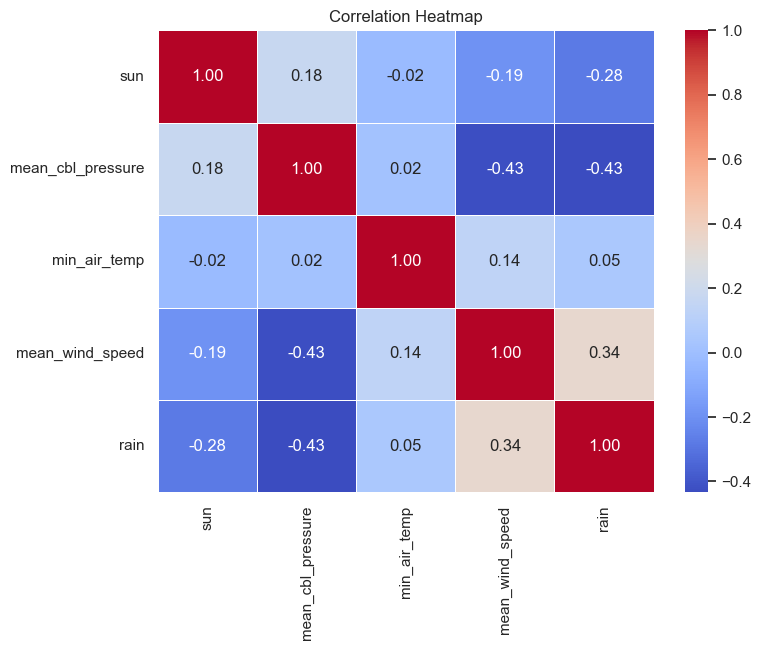

In [181]:

# Dataframe of key attributes
key_attributes = data.raw[['sun', 'mean_cbl_pressure', 'min_air_temp', 'mean_wind_speed', 'rain']]

# Correlation matrix
corr_matrix = key_attributes.corr()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

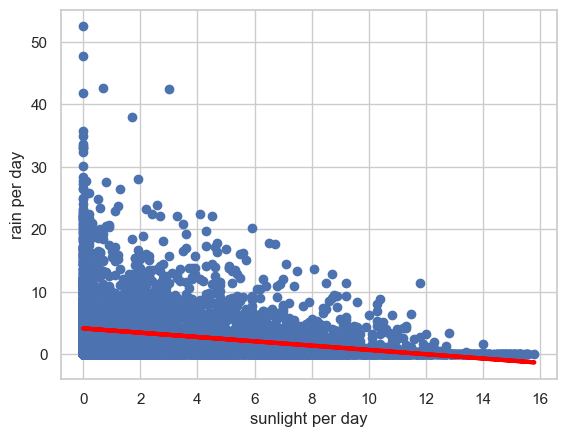

In [185]:
# Draw Graph #
import matplotlib.pyplot as plt
data.raw[['rain', 'sun']] = data.raw[['rain', 'sun']].apply(pd.to_numeric)
sun = data.raw['sun'].values.reshape(-1,1)
rain = data.raw['rain'].values.reshape(-1,1)

reg = LinearRegression().fit(sun, rain)

plt.plot(data.raw[['sun']], data.raw[['rain']], 'o')
plt.plot(data.raw['sun'], reg.predict(sun),color="red",linewidth=3)
plt.xlabel('sunlight per day')
plt.ylabel('rain per day')
plt.show()


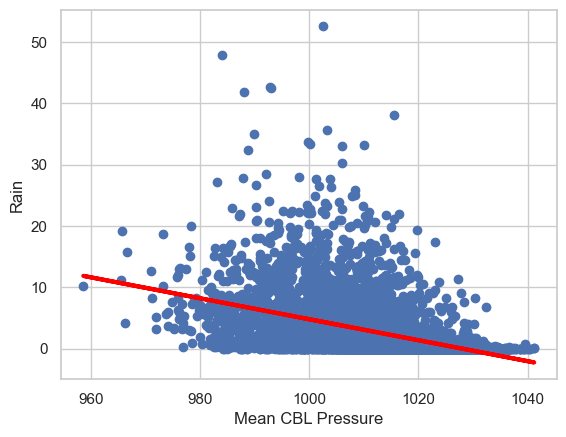

In [186]:

# turning into numeric
data.raw[['rain', 'mean_cbl_pressure']] = data.raw[['rain', 'mean_cbl_pressure']].apply(pd.to_numeric)

# data
mean_cbl_pressure = data.raw['mean_cbl_pressure'].values.reshape(-1,1)
rain = data.raw['rain'].values.reshape(-1,1)

reg = LinearRegression().fit(mean_cbl_pressure, rain)

# scatter plot
plt.scatter(mean_cbl_pressure, rain, c='b', marker='o')
plt.plot(data.raw['mean_cbl_pressure'], reg.predict(mean_cbl_pressure),color="red",linewidth=3)
plt.xlabel('Mean CBL Pressure')
plt.ylabel('Rain')
plt.show()

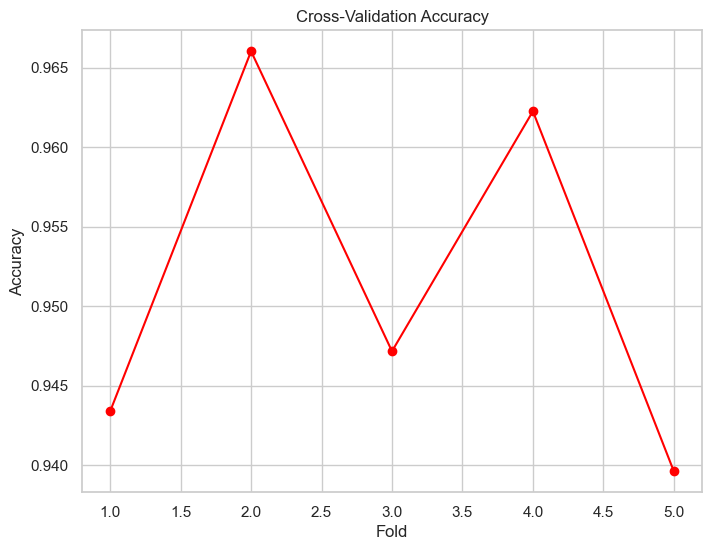

In [187]:
# Plotting accuracy graph
plt.figure(figsize=(8, 6)) 

plt.plot(range(1, 6), scores, marker='o', linestyle='-', color='red')
plt.title('Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

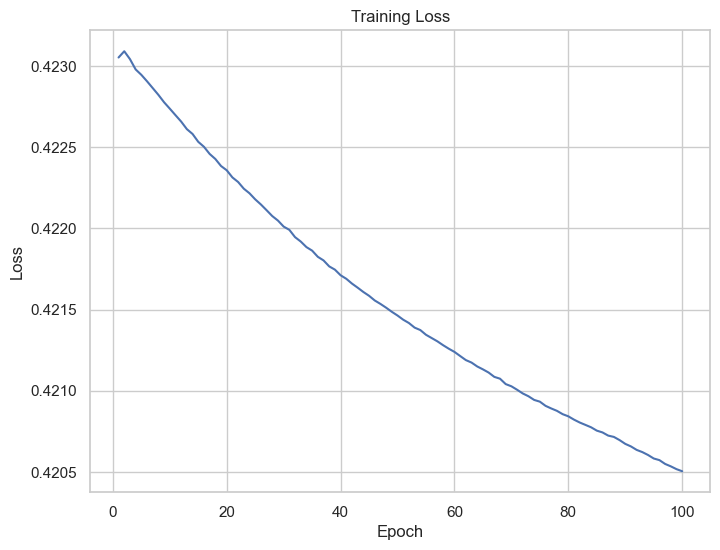

In [188]:
# Plotting  loss graph
plt.figure(figsize=(8, 6)) 

plt.plot(range(1, 101), training_losses, color='b')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.show()

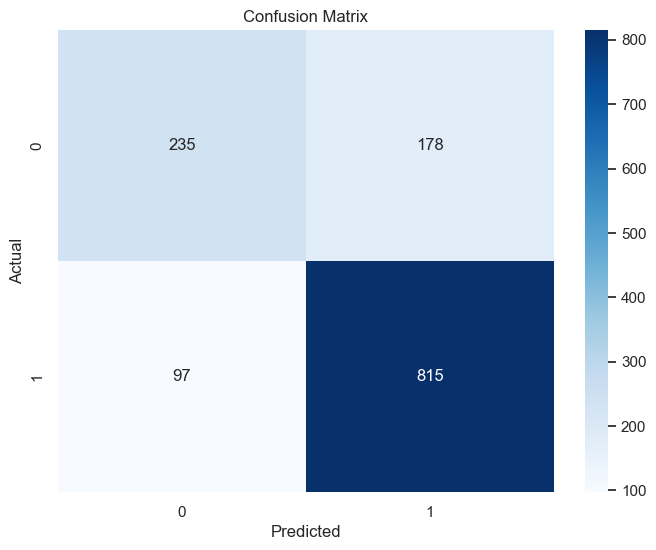

In [189]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions for the test set
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()